In [1]:
from highlight_text import ax_text,fig_text
import mplsoccer
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
from highlight_text import htext

from scrape import scrape_data_fbref as fbref

In [3]:
df_fbref = fbref.readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')
no_90s = 5
df_fil = df_fbref[df_fbref['90s']>=no_90s] # select player that have played more than 5 games
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])] # select only fowards

In [2]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF6666"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [1]:
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="-.",lw="0.5",color="lightgrey", zorder=1)

# plot line y=x
ax.plot([-0.05, 1.5], [-0.05, 1.5], 'k-', alpha=0.75, zorder=2, color="w")

x = (df_fil['npxG']/df_fil['90s']).to_list()
y = (df_fil['Gls']/df_fil['90s']).to_list()
ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.5, lw=0.5, zorder=3)


#title + labels
ax.set_title("Golos Marcados vs Expected Goals" ,fontsize=22, fontfamily=title_font,color=text_color, fontweight = 'bold')
ax.set_xlabel("Expected Goals / 90 minutos", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Golos Marcados / 90 minutos", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

#eixos
ax.tick_params(axis="both",length=0)
spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color("white")


fig.text(0.05, -0.025, "Criado por João Alves / @joao97_alves. Dados obtidos em fbref.com",
        fontsize=11, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("example_scatterplot.png", bbox_inches='tight', dpi=300)

NameError: name 'plt' is not defined

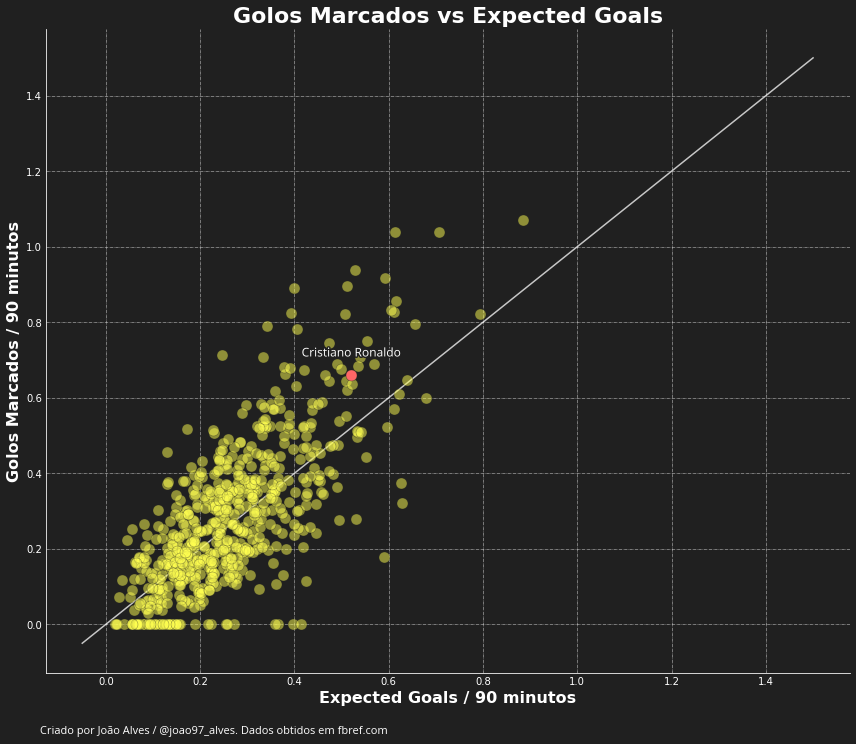

In [9]:
def plot_specific_point(name, x_location=0, y_location=0):
    df_player = df_fil[df_fil['Player']==name]
    x_player, y_player = df_player['npxG']/df_player['90s'], df_player['Gls']/df_player['90s']

    #plot a specific point for a specific player
    ax.scatter(x_player,y_player,s=120,color=primary,edgecolors=background, alpha=1, lw=.25, zorder=4)
    t = ax.text(x_player+x_location ,y_player+y_location, name,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
    t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

plot_specific_point('Cristiano Ronaldo', x_location=0, y_location=0.05)
fig